In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib
import datetime

import nltk
import spacy

from nltk.sentiment import SentimentIntensityAnalyzer, vader

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation, NMF

from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, MeanShift

from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance

from sklearn import preprocessing

from sklearn import metrics

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import joblib
pd.options.display.colheader_justify = 'right'
pd.options.display.column_space = 1
pd.options.display.expand_frame_repr = True
pd.options.display.max_colwidth = 120

# Import Models

In [11]:
model_dir = './pickled_models'
savedir= './plots'

In [5]:
lda_topics_df = joblib.load(f'{model_dir}/lda_topics_df.joblib')
lda_W = joblib.load(f'{model_dir}/lda_W.joblib')
df = joblib.load('data/clean/clean_df.joblib')
df = df.loc[df.body != 'full quote', :] # drop the 'full quote' only comment
df = df[~df.body.str.contains("streamable mirror")] # Drop twitter bot comments

In [37]:
lda_topics_df = joblib.load(f'{model_dir}/test_lda_topics_df.joblib')
lda_W = joblib.load(f'{model_dir}/test_lda_W.joblib')

# Plot Functions

In [ ]:
lda

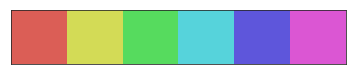

In [10]:
sns.set_style('white')
sns.palplot(sns.color_palette("hls", 6))
sns.set_palette(sns.color_palette("hls", 6))

In [771]:
# write function that slices on label, and plots what you want.
def cluster_count_by_time(df, cluster_col, time_col, time_chunk, 
                          cluster_labels, cluster_nums, save=False, 
                          filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # slice DF to that label
        dfZ = df[df[cluster_col] == i]
        
        # group everything by year/time
        dfZ = dfZ.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count().reset_index()
        
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(dfZ[time_col], dfZ[cluster_col], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='lower right', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title('LDA Topics', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nYear', y=1.105, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))

    return plt

In [772]:
def cluster_norm_by_time(df, cluster_col, time_col, time_chunk, 
                         cluster_labels, cluster_nums, save=False,
                        filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # create df with count of all labels by the time_chunk grouping
        df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        df_master.rename(columns={cluster_col:'count_of_all_labels'}, inplace=True)
        
        # create df with count of only INTERESTED cluster label by time_chunk grouping
        dfX = df[df[cluster_col] == i]
        
        # slice df to that ratio
        dfZ = dfX.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        dfZ.rename(columns={time_chunk:'count_of_interest_label'}, inplace=True)
        
        # add column to master one (dfA)
        df_master['count_of_interest_only'] = dfZ
        
        #make ratio column
        df_master['ratio'] = df_master.count_of_interest_only / df_master.count_of_all_labels
        
        df_master = df_master.reset_index()
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(df_master[time_col], df_master['ratio'], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='lower right', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title('LDA Topics', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Proportion\nof Total', y=1.110, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0, ymax=0.40)

    return plt

# LDA Topic Plots

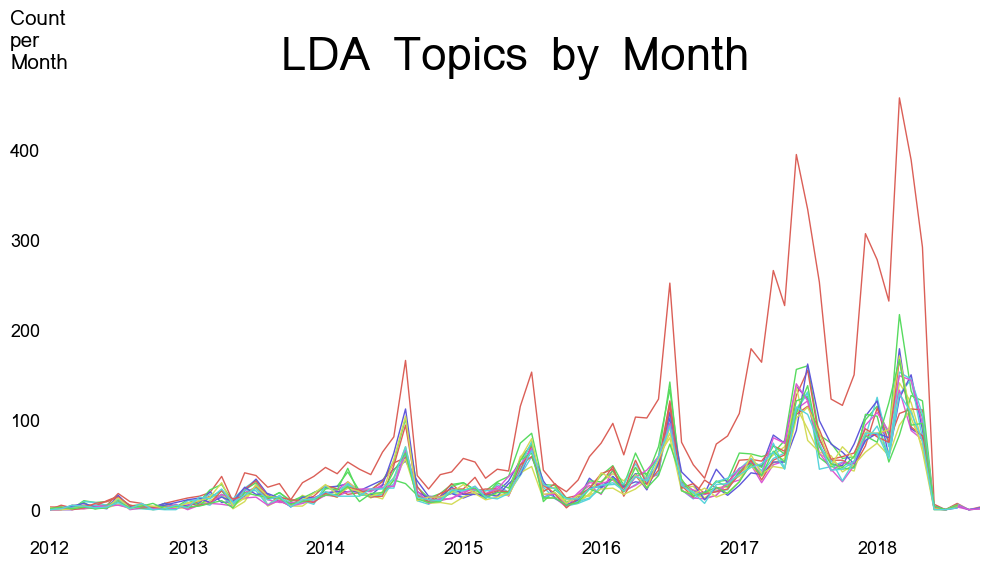

In [24]:
# write function that slices on label, and plots what you want.
def cluster_count_by_time(df, cluster_col, time_col, time_chunk, 
                          cluster_labels, cluster_nums, save=False, 
                          filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # slice DF to that label
        dfZ = df[df[cluster_col] == i]
        
        # group everything by year/time
        dfZ = dfZ.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count().reset_index()
        
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(dfZ[time_col], dfZ[cluster_col], linewidth=1)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'black',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'black',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'black',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
#     leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
#     for text in leg.get_texts():
#         plt.setp(text, color = 'black')
    plt.title('LDA Topics by Month', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nMonth', y=1.15, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    sns.despine(left=True, bottom=True)
    return plt

cluster_names = ['Miami Heat', 'Unknown 1', 'Unknown 2'
                'Best Player in League', 'East Conference / Cavs', 'Reg Season', 
                'Free Throws', 'Unknown 3', 'Michael Jordan / Greatest of All Time', 'Unknown 4', 'High School',
                'Defense and Offense', 'Watch him / fan perspective / hear him', 'Flop/Criticism', 'Stats / Triple Doubles'
                'Unknown 5',]
cluster_nums = [ 0, 1, 2,
                3, 
                4, 5, 
                6, 7, 8, 9, 10, 
                11, 12, 13, 14,
                15
                ]
plot_lda_df = lda_topics_df[lda_topics_df['topics'].isin(cluster_nums)]

fig = cluster_count_by_time(plot_lda_df, 'topics', 'time', 'M', 
                      cluster_names, cluster_nums, filename='lda_cluster_counts.png')

fig.savefig(f'{savedir}/all_lda_cluster_counts.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

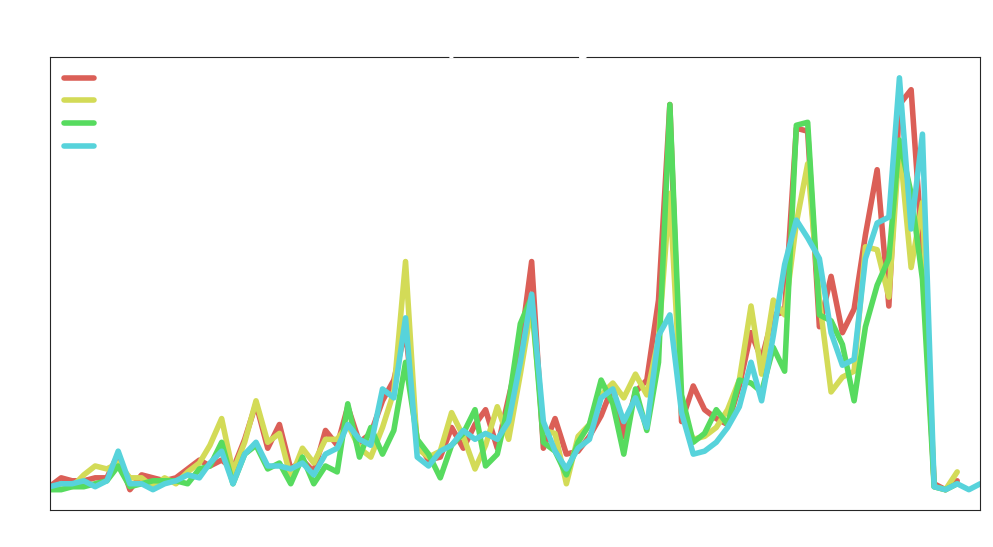

In [774]:
# write function that slices on label, and plots what you want.
def cluster_count_by_time(df, cluster_col, time_col, time_chunk, 
                          cluster_labels, cluster_nums, save=False, 
                          filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # slice DF to that label
        dfZ = df[df[cluster_col] == i]
        
        # group everything by year/time
        dfZ = dfZ.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count().reset_index()
        
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(dfZ[time_col], dfZ[cluster_col], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title('LDA Topics by Month', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nMonth', y=1.105, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))

    return plt

cluster_names = [#'Miami Heat', 
                'Best Player in League',# 'East Conference / Cavs', 'Reg Season', 
                'Free Throws', 'Michael Jordan / Greatest of All Time', 'High School',
                #'Defense and Offense', 'Watch him / fan perspective / hear him', 'Flop/Criticism', 'Stats / Triple Doubles'
                ]
cluster_nums = [ #0, 
                3, 
                #4, 5, 
                6, 8, 10, 
                #11, 12, 13, 14
                ]
plot_lda_df = lda_topics_df[lda_topics_df['topics'].isin(cluster_nums)]

fig = cluster_count_by_time(plot_lda_df, 'topics', 'time', 'M', 
                      cluster_names, cluster_nums, filename='lda_cluster_counts.png')

fig.savefig(f'{savedir}/monthly_lda_cluster_counts.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

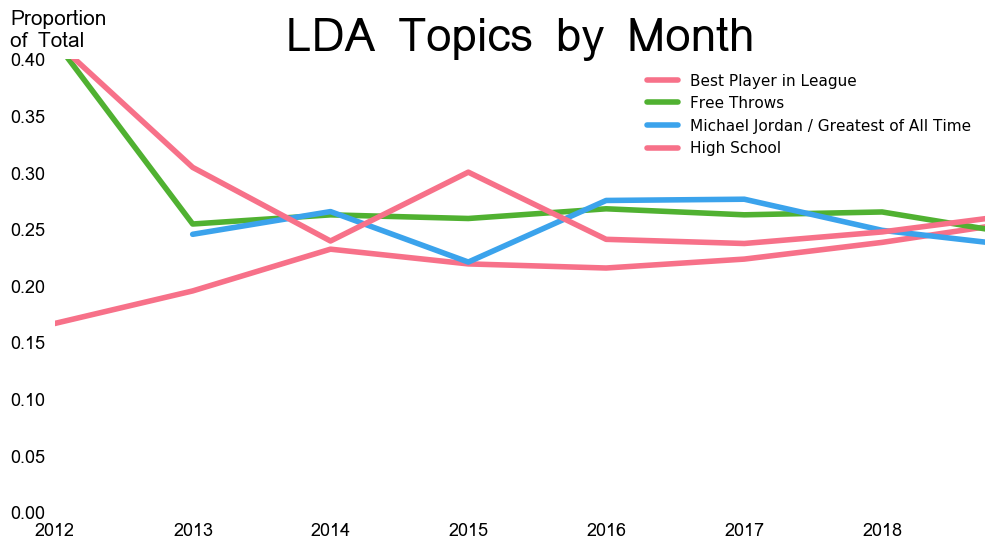

In [40]:
def cluster_norm_by_time(df, cluster_col, time_col, time_chunk, 
                         cluster_labels, cluster_nums, save=False,
                        filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # create df with count of all labels by the time_chunk grouping
        df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        df_master.rename(columns={cluster_col:'count_of_all_labels'}, inplace=True)
        
        # create df with count of only INTERESTED cluster label by time_chunk grouping
        dfX = df[df[cluster_col] == i]
        
        # slice df to that ratio
        dfZ = dfX.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        dfZ.rename(columns={time_chunk:'count_of_interest_label'}, inplace=True)
        
        # add column to master one (dfA)
        df_master['count_of_interest_only'] = dfZ
        
        #make ratio column
        df_master['ratio'] = df_master.count_of_interest_only / df_master.count_of_all_labels
        
        df_master = df_master.reset_index()
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(df_master[time_col], df_master['ratio'], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'black',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'black',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'black',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'black')
    plt.title('LDA Topics by Month', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Proportion\nof Total', y=1.110, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0, ymax=0.40)
    sns.despine(left=True, bottom=True)

    return plt

cluster_names = [#'Miami Heat', 
                'Best Player in League',# 'East Conference / Cavs', 'Reg Season', 
                'Free Throws', 'Michael Jordan / Greatest of All Time', 'High School',
                #'Defense and Offense', 'Watch him / fan perspective / hear him', 'Flop/Criticism', 'Stats / Triple Doubles'
                ]
cluster_nums = [ #0, 
                3, 
                #4, 5, 
                6, 8, 10, 
                #11, 12, 13, 14
                ]
plot_lda_df = lda_topics_df[lda_topics_df['topics'].isin(cluster_nums)]

fig = cluster_norm_by_time(plot_lda_df, 'topics', 'time', 'Y', 
                           cluster_names, cluster_nums, filename='lda_cluster_proportion.png')

fig.savefig(f'{savedir}/black_yearly_lda_cluster_proportion.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

## Inertia check for optimal KMEANS # on my 

In [702]:
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }

In [703]:
inertia = []
list_num_clusters = list(range(13,22))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=0, n_jobs=-1)
    km.fit(lda_W)
    inertia.append(km.inertia_)

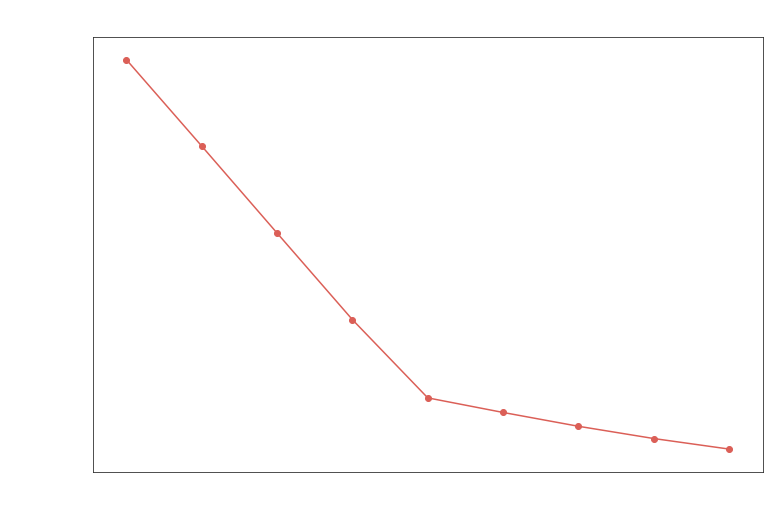

In [707]:
plt.figure(figsize = (12,8))
plt.plot(list_num_clusters,inertia)
plt.title('KMeans Inertia', **titlefont)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters', **xfont_labels)
plt.ylabel('Inertia', rotation=0, labelpad = 50, **yfont_labels)
plt.xticks(**xfont_ticks)
plt.yticks(**yfont_ticks)
plt.savefig(f'{savedir}/kmeans_inertia.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

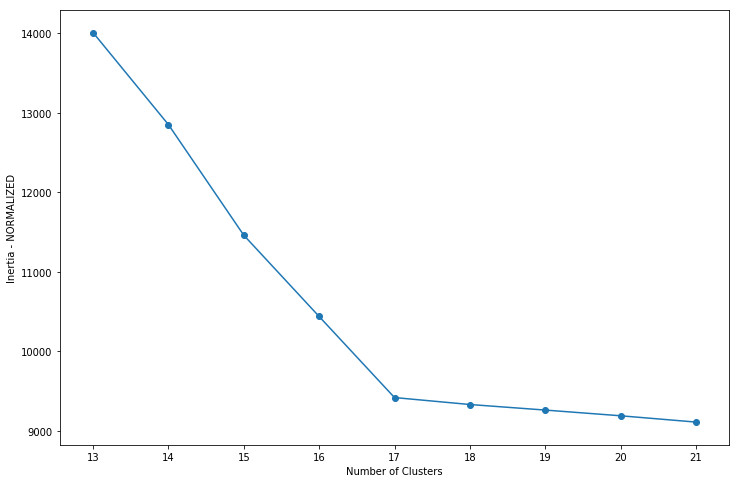

In [250]:
inertia = []
list_num_clusters = list(range(13,22))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=0, n_jobs=-1)
    X_Norm = preprocessing.normalize(lda_W) # to normalise existing X
    km.fit(X_Norm)
    inertia.append(km.inertia_)

plt.figure(figsize = (12,8))
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia - NORMALIZED');

### Make Kmeans model on recommended k=17

In [27]:
kmc = KMeansClusterer(17, distance=cosine_distance, repeats=25, avoid_empty_clusters=True)
assigned_clusters = kmc.cluster(lda_W, assign_clusters=True)

kmeans_df = pd.DataFrame(lda_W, copy=True)
kmeans_df['clusters'] = pd.Series(assigned_clusters)
kmeans_df['time'] = df.reset_index()['created_utc']
# kmeans_df.head()

# KMEANS PLOTS

In [32]:
cluster_names = ['Jokes', 'Top current players', 'Leadership and basketball strategy',
                 'Best player of all time', 'Steals, shots, rebounds, scoring, etc.']
cluster_nums = [4, 5, 6, 13, 14]
# kmeans_plot_df = kmeans_df[kmeans_df['clusters'].isin(cluster_nums)]

In [34]:
# joblib.dump(kmeans_plot_df, './pickled_models/kmeans_plot_df.joblib')

['./pickled_models/kmeans_plot_df.joblib']

In [36]:
kmeans_plot_df = joblib.load('./pickled_models/kmeans_plot_df.joblib')

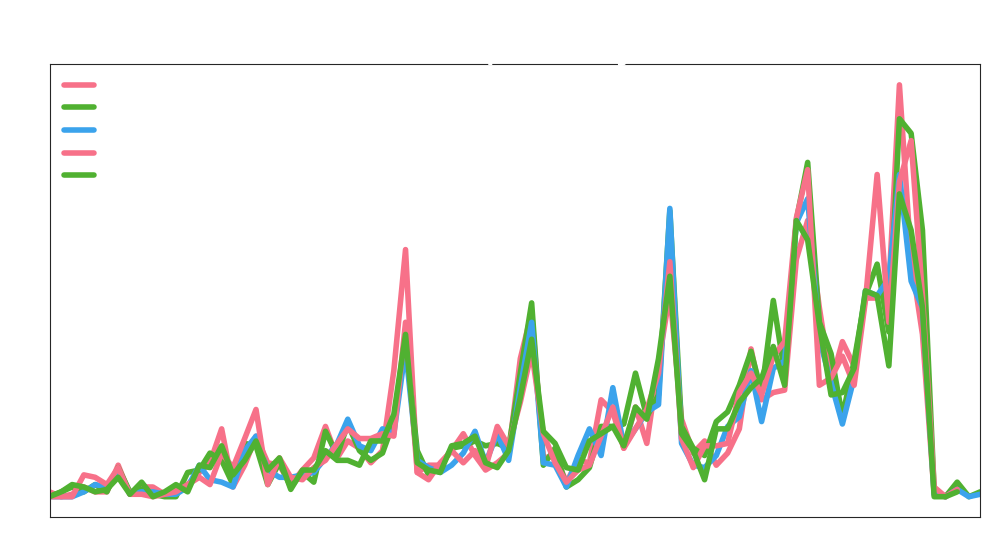

In [33]:
# write function that slices on label, and plots what you want.
def cluster_count_by_time(df, cluster_col, time_col, time_chunk, 
                          cluster_labels, cluster_nums, save=False, 
                          filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # slice DF to that label
        dfZ = df[df[cluster_col] == i]
        
        # group everything by year/time
        dfZ = dfZ.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count().reset_index()
        
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(dfZ[time_col], dfZ[cluster_col], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title('KMeans Topics by Month', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nMonth', y=1.120, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))

    return plt

fig = cluster_count_by_time(kmeans_plot_df, cluster_labels=cluster_names, cluster_col='clusters', time_col='time', time_chunk='M', cluster_nums=cluster_nums)

fig.savefig(f'{savedir}/wait_monthly_kmeans_cluster_counts.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

In [28]:
cluster_names = ['Jokes', 'Top current players', 'Leadership and basketball strategy',
                 'Best player of all time', 'Steals, shots, rebounds, scoring, etc.']
cluster_nums = [4, 5, 6, 13, 14]
kmeans_plot_df = kmeans_df[kmeans_df['clusters'].isin(cluster_nums)]

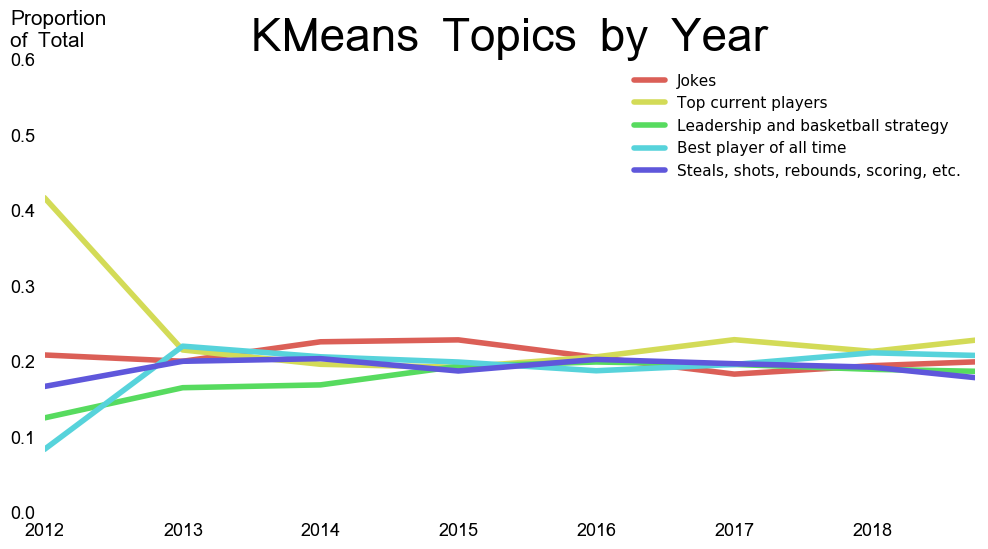

In [29]:
def cluster_norm_by_time(df, cluster_col, time_col, time_chunk, 
                         cluster_labels, cluster_nums, save=False,
                        filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # create df with count of all labels by the time_chunk grouping
        df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        df_master.rename(columns={cluster_col:'count_of_all_labels'}, inplace=True)
        
        # create df with count of only INTERESTED cluster label by time_chunk grouping
        dfX = df[df[cluster_col] == i]
        
        # slice df to that ratio
        dfZ = dfX.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        dfZ.rename(columns={time_chunk:'count_of_interest_label'}, inplace=True)
        
        # add column to master one (dfA)
        df_master['count_of_interest_only'] = dfZ
        
        #make ratio column
        df_master['ratio'] = df_master.count_of_interest_only / df_master.count_of_all_labels
        
        df_master = df_master.reset_index()
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(df_master[time_col], df_master['ratio'], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'black',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'black',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'black',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'black')
    plt.title('KMeans Topics by Year', **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Proportion\nof Total', y=1.110, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0, ymax=0.60)
    sns.despine(left=True, bottom=True)
    return plt

fig = cluster_norm_by_time(kmeans_plot_df, cluster_labels=cluster_names, cluster_col='clusters', time_col='time', time_chunk='Y', cluster_nums=cluster_nums)

fig.savefig(f'{savedir}/black_annual_kmeans_cluster_proportion.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

## Drop "goofy and jokes" then plot

In [779]:
cluster_names = ['Top current players', 'Leadership and basketball strategy',
                 'Best player of all time', 'Steals, shots, rebounds, scoring, etc.']
cluster_nums = [5, 6, 13, 14]
kmeans_plot_df = kmeans_df[kmeans_df['clusters'].isin(cluster_nums)]

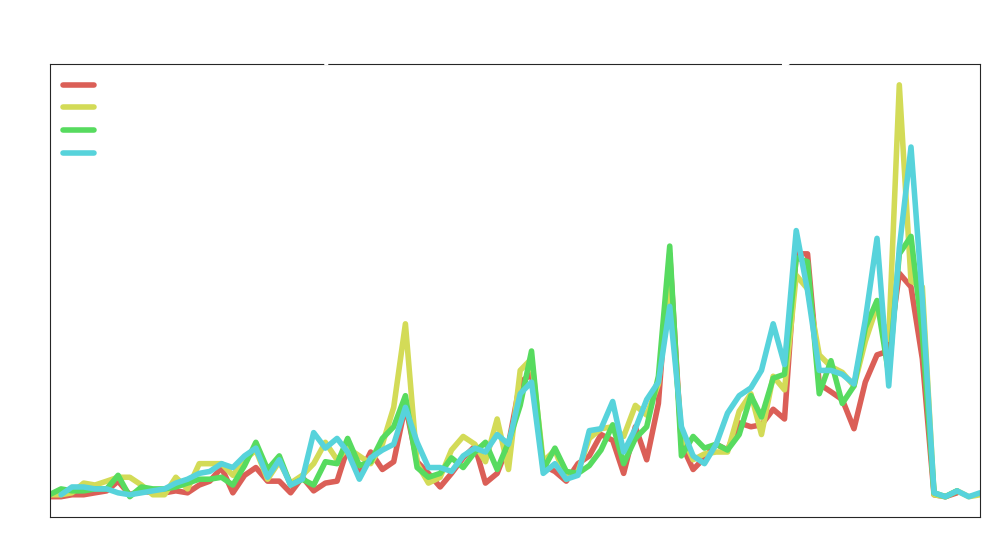

In [780]:
# write function that slices on label, and plots what you want.
def cluster_count_by_time(df, cluster_col, time_col, time_chunk, 
                          cluster_labels, cluster_nums, save=False, 
                          filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # slice DF to that label
        dfZ = df[df[cluster_col] == i]
        
        # group everything by year/time
        dfZ = dfZ.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count().reset_index()
        
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(dfZ[time_col], dfZ[cluster_col], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title("KMeans Topics without 'Jokes' by Month", **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nMonth', y=1.120, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))

    return plt

fig = cluster_count_by_time(kmeans_plot_df, cluster_labels=cluster_names, cluster_col='clusters', time_col='time', time_chunk='M', cluster_nums=cluster_nums)

fig.savefig(f'{savedir}/monthly_kmeans_cluster_counts_no_jokes.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

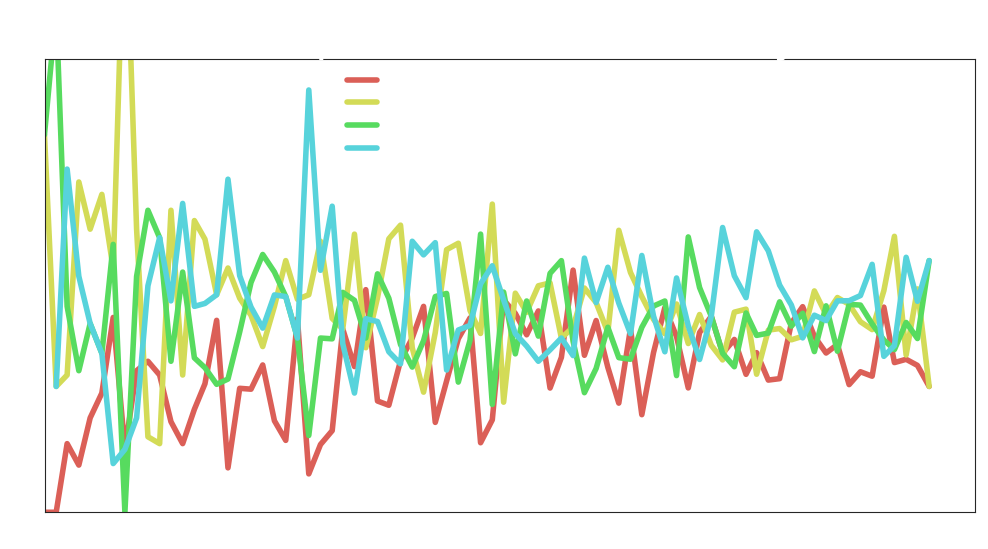

In [781]:
def cluster_norm_by_time(df, cluster_col, time_col, time_chunk, 
                         cluster_labels, cluster_nums, save=False,
                        filename=None):
    df = df.loc[:, [cluster_col, time_col]]    
    
    plt.figure(figsize=(12,6), dpi=100)
    
    for i in cluster_nums:
        # create df with count of all labels by the time_chunk grouping
        df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        df_master.rename(columns={cluster_col:'count_of_all_labels'}, inplace=True)
        
        # create df with count of only INTERESTED cluster label by time_chunk grouping
        dfX = df[df[cluster_col] == i]
        
        # slice df to that ratio
        dfZ = dfX.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).count()
        dfZ.rename(columns={time_chunk:'count_of_interest_label'}, inplace=True)
        
        # add column to master one (dfA)
        df_master['count_of_interest_only'] = dfZ
        
        #make ratio column
        df_master['ratio'] = df_master.count_of_interest_only / df_master.count_of_all_labels
        
        df_master = df_master.reset_index()
        # plot dataframe
#         dfZ.plot(x=time_col, y=cluster_col, figsize=(12,8))
        plt.plot(df_master[time_col], df_master['ratio'], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=cluster_labels, loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title("KMeans Topics without 'Jokes' by Month", **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Proportion\nof Total', y=1.110, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0, ymax=0.60)

    return plt

fig = cluster_norm_by_time(kmeans_plot_df, cluster_labels=cluster_names, cluster_col='clusters', time_col='time', time_chunk='M', cluster_nums=cluster_nums)

fig.savefig(f'{savedir}/monthly_kmeans_cluster_proportion_no_jokes.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

# Sentiment Analysis

In [30]:
SIA = vader.SentimentIntensityAnalyzer()
SIA.polarity_scores('i am the best ever').get('compound') > 0

True

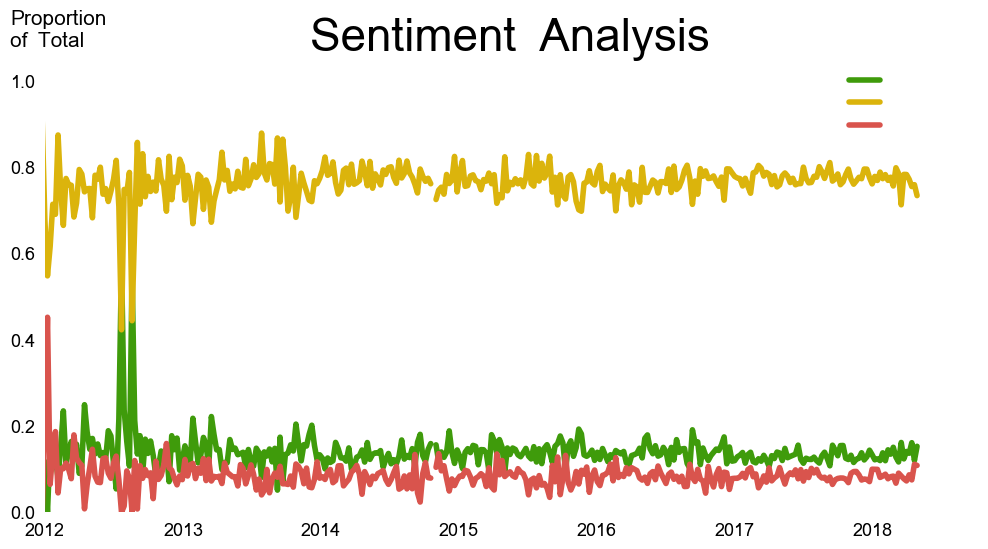

In [49]:
def plot_sentiment_byratio(df, text_col, time_col, time_chunk):
    sns.set_style('white')
    #sns.palplot(sns.color_palette("hls", 6))
    sns.set_palette(sns.color_palette("husl", 3))
    df = df.loc[:, [text_col, time_col]]
    df['sentiment_dict'] = df.body.apply(SIA.polarity_scores)
    
    df['sentiment_pos'] = df['sentiment_dict'].map(lambda x: x.get('pos'))   
    df['sentiment_neu'] = df['sentiment_dict'].map(lambda x: x.get('neu'))   
    df['sentiment_neg'] = df['sentiment_dict'].map(lambda x: x.get('neg'))       
    # df['sentiment_compounds'] = df['sentiment_dict'].map(lambda x: x.get('compound'))   
    df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).mean().reset_index()
    
    plt.figure(figsize=(12,6), dpi=100)
    #plt.plot(df_master[time_col], df_master['sentiment_compounds'])
    plt.plot(df_master[time_col], df_master['sentiment_pos'], linewidth=4, c=sns.xkcd_rgb["grass green"])
    plt.plot(df_master[time_col], df_master['sentiment_neu'], linewidth=4, c=sns.xkcd_rgb["gold"])
    plt.plot(df_master[time_col], df_master['sentiment_neg'], linewidth=4, c=sns.xkcd_rgb["pale red"] )
    
    
    yfont_labels = {'fontname':'Umpush',
             'color':'black',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'black',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'black',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'black',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=['Positive', 'Neutral', 'Negative'], loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title("Sentiment Analysis", **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Proportion\nof Total', y=1.110, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0)
    sns.despine(left=True, bottom=True)
    
    return plt
    
fig = plot_sentiment_byratio(df, 'body', 'created_utc', 'W')

#fig.savefig(f'{savedir}/black_weekly_sentiment_analysis_propotion2.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

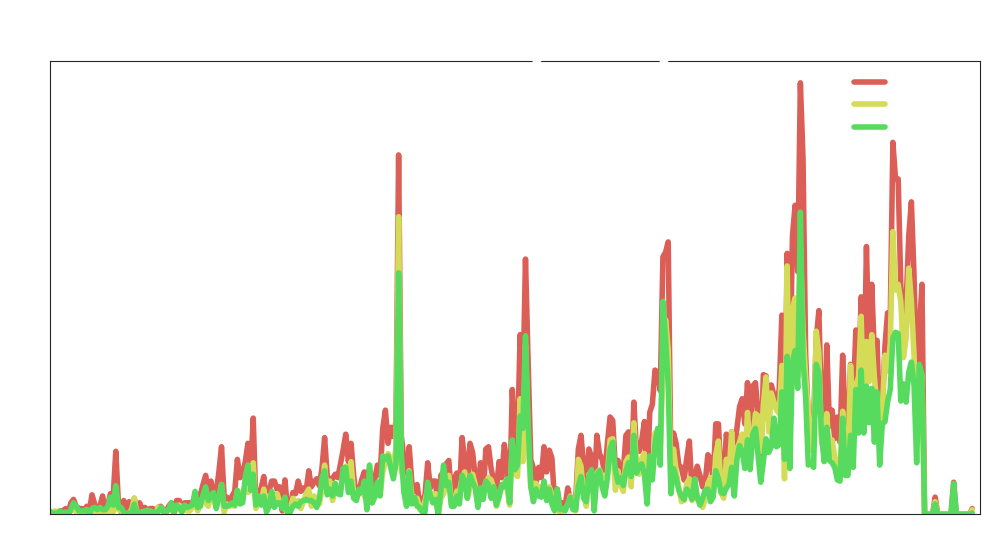

In [783]:
def plot_sentiment_bycount(df, text_col, time_col, time_chunk):
    df = df.loc[:, [text_col, time_col]]
    df['sentiment_dict'] = df.body.apply(SIA.polarity_scores)    
    df['sentiment_pos'] = df['sentiment_dict'].apply(lambda x: 1 if x.get('compound') > 0 else 0)
    df['sentiment_neu'] = df['sentiment_dict'].apply(lambda x: 1 if x.get('compound') == 0 else 0)   
    df['sentiment_neg'] = df['sentiment_dict'].apply(lambda x: 1 if x.get('compound') < 0 else 0)                  
    df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).sum().reset_index()
    
    plt.figure(figsize=(12,6), dpi=100)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 9))
    plt.plot(df_master[time_col], df_master['sentiment_pos'], linewidth=4)
    plt.plot(df_master[time_col], df_master['sentiment_neu'], linewidth=4)
    plt.plot(df_master[time_col], df_master['sentiment_neg'], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=['Positive', 'Neutral', 'Negative'], loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title("Sentiment Analysis by Week", **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nMonth', y=1.115, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0)
    
    return plt
    
fig = plot_sentiment_bycount(df, 'body', 'created_utc', 'W')

fig.savefig(f'{savedir}/weekly_sentiment_analysis_count.png', format='png', dpi=300, bbox_inches='tight', transparent=True)   


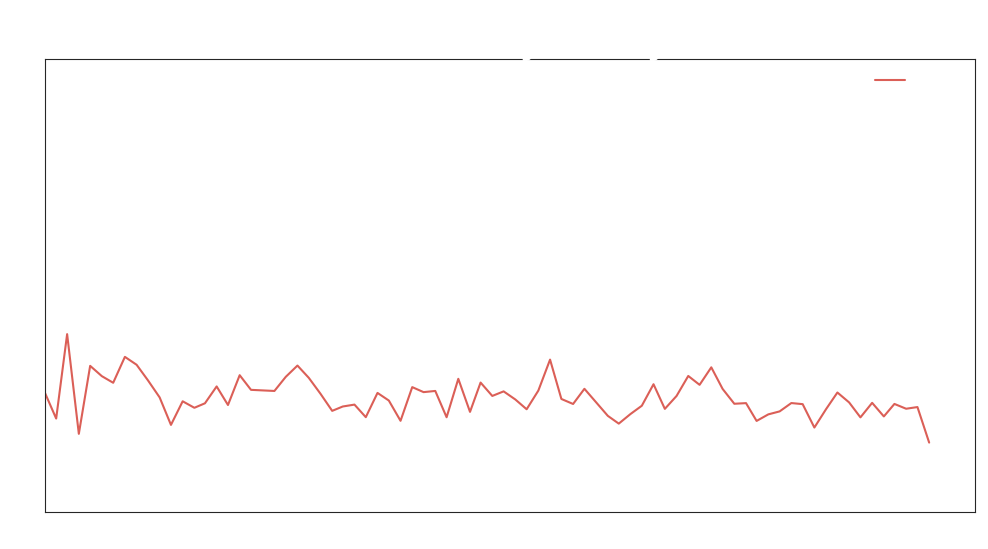

In [785]:
def plot_sentiment_byratio(df, text_col, time_col, time_chunk):
    df = df.loc[:, [text_col, time_col]]
    df['sentiment_dict'] = df.body.apply(SIA.polarity_scores)
    
#     df['sentiment_pos'] = df['sentiment_dict'].map(lambda x: x.get('pos'))   
#     df['sentiment_neu'] = df['sentiment_dict'].map(lambda x: x.get('neu'))   
#     df['sentiment_neg'] = df['sentiment_dict'].map(lambda x: x.get('neg'))       
    df['sentiment_compounds'] = df['sentiment_dict'].map(lambda x: x.get('compound'))   
    df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).mean().reset_index()
    
    plt.figure(figsize=(12,6), dpi=100)
    plt.plot(df_master[time_col], df_master['sentiment_compounds'])
#     plt.plot(df_master[time_col], df_master['sentiment_pos'], linewidth=4)
#     plt.plot(df_master[time_col], df_master['sentiment_neu'], linewidth=4)
#     plt.plot(df_master[time_col], df_master['sentiment_neg'], linewidth=4)
    
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=['Score'], loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title("Sentiment Analysis by Month", **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Proportion\nof Total', y=1.110, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
#     plt.ylim(ymin=0)
    
    return plt
    
fig = plot_sentiment_byratio(df, 'body', 'created_utc', 'M')

fig.savefig(f'{savedir}/monthly_compound_sentiment_analysis_propotion.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

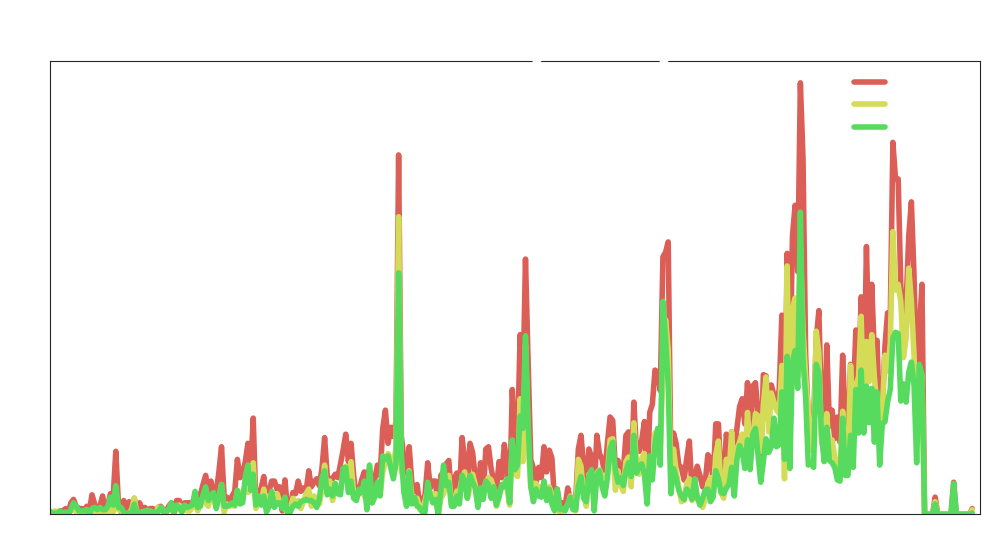

In [783]:
def plot_sentiment_bycount(df, text_col, time_col, time_chunk):
    df = df.loc[:, [text_col, time_col]]
    df['sentiment_dict'] = df.body.apply(SIA.polarity_scores)    
    df['sentiment_pos'] = df['sentiment_dict'].apply(lambda x: 1 if x.get('compound') > 0 else 0)
    df['sentiment_neu'] = df['sentiment_dict'].apply(lambda x: 1 if x.get('compound') == 0 else 0)   
    df['sentiment_neg'] = df['sentiment_dict'].apply(lambda x: 1 if x.get('compound') < 0 else 0)                  
    df_master = df.groupby([pd.Grouper(key=time_col, freq=time_chunk)]).sum().reset_index()
    
    plt.figure(figsize=(12,6), dpi=100)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 9))
    plt.plot(df_master[time_col], df_master['sentiment_pos'], linewidth=4)
    plt.plot(df_master[time_col], df_master['sentiment_neu'], linewidth=4)
    plt.plot(df_master[time_col], df_master['sentiment_neg'], linewidth=4)
    
    yfont_labels = {'fontname':'Umpush',
             'color':'white',
             'ha':'left',
             'verticalalignment':'top',
             'size': 15}

    xfont_labels = {'fontname':'Umpush',
             'color':'white',
             'size': 13}
    
    yfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}

    xfont_ticks = {'fontname':'Umpush',
             'color':'white',
             'size': 13}    
    
    
    titlefont = {'fontname':'Umpush',
             'color':'white',
             'size': 33}
    
    legendfont = {#'fontname':'Umpush',
             #'color':'white',
             'fontsize': 11,
             'frameon': False,
             'fancybox': False,
                 }
    
    leg = plt.legend(labels=['Positive', 'Neutral', 'Negative'], loc='best', **legendfont)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    plt.title("Sentiment Analysis by Week", **titlefont)
    plt.xticks(**xfont_ticks)
    plt.yticks(**yfont_ticks)
    plt.ylabel('Count\nper\nMonth', y=1.115, 
               rotation=0, labelpad = 0, **yfont_labels)
    plt.xlabel('',**yfont_labels)
    plt.xlim(datetime.date(2012, 1, 1), datetime.date(2018, 9, 29))
    plt.ylim(ymin=0)
    
    return plt
    
fig = plot_sentiment_bycount(df, 'body', 'created_utc', 'W')

fig.savefig(f'{savedir}/weekly_sentiment_analysis_count.png', format='png', dpi=300, bbox_inches='tight', transparent=True)   
